# Evaluation Metrics

## Pre-requisites

We will need the library **scikit-learn** for this example. Ensure this is installed by executing the code cell below or by using pip manually in the command prompt / terminal.

In [11]:
%pip install scikit-learn


## Introduction

This week, we've looked at training our Perceptron model, and then how we can construct bigger networks by layering these perceptrons together. Today we will introduce some evaluative metrics for our networks when we wish to evaluate performance for a binary classification problem (falling under supervised machine learning).

Before we begin, let us assume that you have created a model in Keras, and it is **trained**.

We should have the following:
* $X$ - Our testing dataset
$$X = (x_{1}, x_{2}, \dots, x_{n}) $$
Where $x_{i}$ is a single record, containing data. E.g could be 11 features of wine (acidity, ph, sulphates, etc). This will *NOT* have the y label in it.

* $y_{true}$ - Labels corresponding to our data.
$$y_{true} = (y_{1}, y_{2}, \dots, y_{n})$$

* $model$ - A trained Keras model

For each entry in $X$ we have a corresponding entry in $y_{true}$

## Obtaining predictions

In order to evaluate how well our model has done in the task, we must first obtain what the model thinks the correct y labels should be. We can do this using the `model.predict()` function. This provides input data to the model and will run a forward pass on the data to obtain the network's estimate. This is called *inference*. Once we have all the predicted y values, we can run our own metric calculations.

E.g
```python
y_pred = model.predict( X )
```

Typically, we save the output of this as $y_{pred}$ to differentiate from our ground-truth data $y_{true}$.

For binary classification, let's provide some example data for what $y_{true}$ and $y_{pred}$ may look like.

$y_{true} = [1, 1, 1, 0, 0, 1, 0, 1]$

$y_{pred} = [1, 1, 0, 0, 1, 0, 0, 1]$

Looking at the two lists, we can see that mostly our network predicted correctly; however, some cases the network gets the answer wrong.

### TP, TN, FP, FN

We can denote 4 basic metrics for classification evaluation. These are true-positive (TP), true-negative (TN), false-positive (FP), and false-negative (FN). We treat these as tallies, and count up for all elements of our predicted output.

* TP - Where the ground-truth class is positive (1) and the predicted class is positive (1)
* TN - Where the ground-truth class is negative (0) and the predicted class is negative (0)
* FP - Where the ground-truth class is negative (0) and the predicted class is positive (1) - I.e Falsely predicting positive
* FN - Where the ground-truth class is positive (1) and the predicted class is negative (0) - I.e Falsely predicting negative

Let's go through our example, and calculate these:

* TP: How many times is there a 1 for both ground-truth and predicted? **3 times**. (Indices 0, 1, and 7)
* TN: How many times are both negative? **2 times**. (Indices 3 and 6)
* FP: Predict positive, when it should be negative? **Once**. (Index 4)
* FN: How many times falsely negative? **2 times** (Indices 2 and 5)

Note: These tallies should all add up to equal the number of examples we have. 3 + 2 + 1 + 2 = 8. The length of $y_{pred}$ (and $y_{true}$) equals 8 too.

### Confusion Matrices

Now we have our four base metrics, we can put these into a **confusion matrix**. This helps us visualise how many times our classes get 'confused'; that is where a 1 should be a 0, or a 0 should be 1. This uses a heatmap approach to help us identify at-a-glance where we may need to improve.

For now, we will use some dummy data for our $y_{true}$ and $y_{pred}$. Later this week we will plug in some real model output.

Documentation: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay

In [12]:
from sklearn.metrics import confusion_matrix # Import the confusion matrix from sklearn
from sklearn.metrics import ConfusionMatrixDisplay # This is for the visual bit

y_true = [1, 1, 1, 0, 0, 1, 0, 1]
y_pred = [1, 1, 0, 0, 1, 0, 0, 1]

print(confusion_matrix(y_true, y_pred))

[[2 1]
 [2 3]]


2D array returned, but not very useful unless we know which indices are which.

In [13]:
# We can even assign variables to the output! adding .ravel() to the conf matrix.
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")

TP: 3
FP: 1
TN: 2
FN: 2


Visualising the matrix makes things significantly easier.

Note: Each row is a class in the ground-truth data. Each column is a class in the predicted. Therefore, X-Axis is predicted, Y-axis is groundtruth.

In [14]:
ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

ImportError: ConfusionMatrixDisplay.from_predictions requires matplotlib. You can install matplotlib with `pip install matplotlib`

Let's get some more data to make this more apparant. At the moment, our true-negative score is the same as our false-negative score, so this classifier wouldn't be too useful.
**Ideally**, we want the upper left, and bottom right to be high numbers, and the opposing diagonal to be as close to 0 as possible. This means no confusion, and full true-positive, and true-negative tallies.

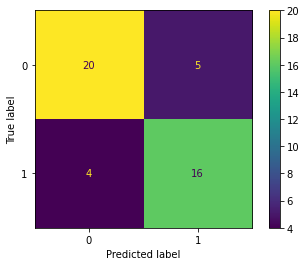

In [ ]:
y_true = [1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]
y_pred = [1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

### Derived Metrics

From these basic 4 tallies we can define some additional metrics which can be useful.

* Accuracy - How many did we guess correctly, out of all possible entries?
$$Accuracy = \frac{TP\ +\ TN}{TP\ +\ TN\ +\ FP\ +\ FN}$$

* Specificity ( True Negative Rate ) - Of all the negative cases, how many did we get right?
$$ Spec = \frac{TN}{TN + FP} = \frac{TN}{All\ groundtruth\ negatives} $$

* Sensitivity (Recall / True Positive Rate ) - Of all the positive cases, how many did we get right?
$$ Sens = \frac{TP}{TP + FN} = \frac{TP}{All\ groundtruth\ positives} $$

* Precision (Positive Predictive Value) - If we guess 1 for everything, our sensitivity will be 100%, but we're not very precise. This answers the question "How many positive predictons were actually correct?"
$$ Precision = \frac{TP}{TP\ +\ FP} = \frac{TP}{All\ predicted\ positives} $$

#### Balance. Which to choose? Introducing F1-Score

Depending on the task, you may wish to focus on maximising a given evaluative metric. You may care more about catching all positive cases, even at the risk of over predicting.

An example may be cancer diagnoses. It can be argued that it's better to provide a false cancer diagnosis (FP) than to miss somebody who may need medical intervention (FN). This would focus on high sensitivity at the cost of precision.

In most real world cases, we want to balance out these considerations to obtain an overall picture of how well our classify performs. This can be achieved by something called the **F1-Score**.

$$ F1-Score = \frac{2}{\frac{1}{precision} \frac{1}{recall}}  = 2\frac{precision * recall}{precision + recall}$$

In [ ]:
# Calculate for the long examples.

# Just seeing what we've got.
print("y_true", y_true)
print("y_pred", y_pred)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")

acc = (tp + tn) / (tp+fp+tn+fn)
spec = tn / (tn+fp)
sens = tp / (tp+fn)
prec = tp / (tp+fp)

f1 = 2 * ((prec * sens)/(prec + sens))

print(f"Accuracy: {acc}")
print(f"Specificity: {spec}")
print(f"Sensitivity: {sens}")








































































































































































print(f"Precision: {prec}")
print(f"F1-Score: {f1}")


NameError: name 'y_true' is not defined

We can use `sklearn` utilities to calculate many of these for us, directly from $y_{true}$ and $y_{pred}$

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

print("Using SKLEARN.")

print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
print(f"No utility for specificity alone")
print(f"Sensitivity: {recall_score(y_true, y_pred)}")
print(f"Precision: {precision_score(y_true, y_pred)}")
print(f"F1-Score: {f1_score(y_true, y_pred)}")

# See:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

Using SKLEARN.
Accuracy: 0.8
No utility for specificity alone
Sensitivity: 0.8
Precision: 0.7619047619047619
F1-Score: 0.7804878048780488


In [ ]:
from sklearn.metrics import classification_report

# See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
# A 'kitchen sink' utility for gathering precision, recall, f-1, support, accuracy.
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.76      0.80      0.78        20

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45

